In [1]:
# Importing Packages used in Coding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
## Importing Data Set Application_Data

app_df = pd.read_csv('application_data.csv')
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#As the total number of columns are huge. Hence, Selecting some columns to perform analysis

app_df = app_df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE']]

In [4]:
#Validating the percentage of Null Values in Application Data Set created from the excel provided in Sample

round(100*(app_df.isnull().sum()/len(app_df.index)),2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
DAYS_BIRTH                     0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
ORGANIZATION_TYPE              0.00
dtype: float64

In [5]:
#Fetching sum of null values
app_df.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
DAYS_BIRTH                       0
CNT_FAM_MEMBERS                  2
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
ORGANIZATION_TYPE                0
dtype: int64

In [6]:
#Fetching Information regarding the data type of dataset

app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
DAYS_BIRTH                     307511 non-null int64
CNT_FAM_MEMBERS          

In [7]:
#As the missing data is not huge. Hence replacing the missing values with the mean of the column 'AMT_ANNUITY'
app_df.loc[np.isnan(app_df['AMT_ANNUITY']),['AMT_ANNUITY']] = app_df['AMT_ANNUITY'].mean()

In [8]:
#Same if being done with the column 'AMT_GOODS_PRICE'
app_df.loc[np.isnan(app_df['AMT_GOODS_PRICE']),['AMT_GOODS_PRICE']] = app_df['AMT_GOODS_PRICE'].mean()

In [9]:
#Same if being done with the column 'CNT_FAM_MEMBERS'
app_df.loc[np.isnan(app_df['CNT_FAM_MEMBERS']),['CNT_FAM_MEMBERS']] = app_df['CNT_FAM_MEMBERS'].mean()

In [10]:
#Creating the data set whose TARGET is equal to 0. Which signifies These clients had no payment difficulties
app_df_0 = app_df.loc[app_df.TARGET==0,:]

In [11]:
#Fetching the sample values to view for the DataFrame created
app_df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,2.0,1,1,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,1.0,2,2,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,2.0,2,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,1.0,2,2,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,-16941,2.0,2,2,Other


In [12]:
#Creating the data set whose TARGET is equal to 1. Which signifies These clients had some payment difficulties
app_df_1 = app_df.loc[app_df.TARGET==1,:]
app_df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,1.0,2,2,Business Entity Type 3
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,-18724,1.0,3,2,Business Entity Type 3
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17482,2.0,2,2,Business Entity Type 3
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13384,2.0,3,3,Self-employed
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24794,2.0,2,2,XNA


In [13]:
#Finding the Data Imbalance of the 2 Subdivided Data Sets before merging with previous application data set.
#Percentage of Data with TARGET as 0 is below :
print(format(len(app_df_0)*100/len(app_df),'.2f')+ '%')

91.93%


In [14]:
#Finding the Data Imbalance of the 2 Subdivided Data Sets before merging with previous application data set.
#Percentage of Data with TARGET as 1 is below :
print(format(len(app_df_1)*100/len(app_df),'.2f') + '%')

8.07%


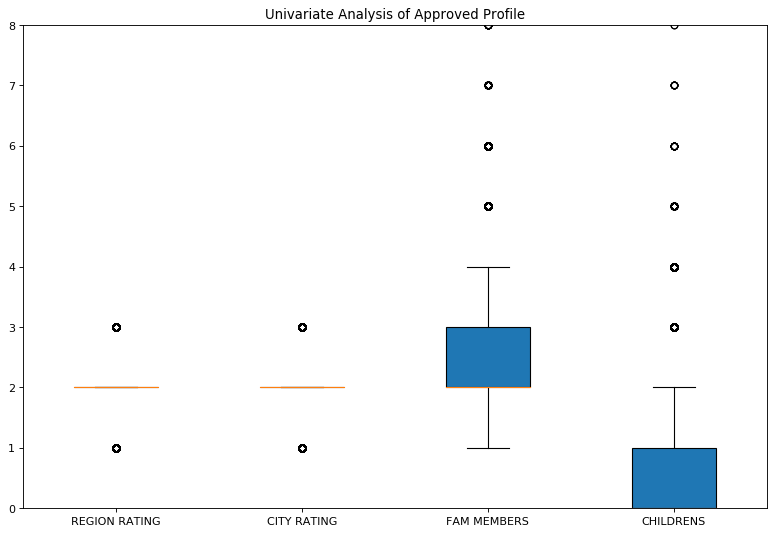

In [15]:
# Creating a box plot to understand univariate analysis if any between the Region, city, family member and number of childern of client whos loan is approved.
# Thought process behind this was to see the correlation if any exisits between these 4 parameters for an applicant.
# As these 4 parameters consumes major chunck of persons earning. Hence these was considered as a prime subjects to perform analysis to understand if there is any pattern which shows these set of client doesn't have any payment difficulties.

# setting figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
#Code to display box plot
box_plot_data=[app_df_0['REGION_RATING_CLIENT'],app_df_0['REGION_RATING_CLIENT_W_CITY'],app_df_0['CNT_FAM_MEMBERS'],app_df_0['CNT_CHILDREN']]
plt.boxplot(box_plot_data,patch_artist=True,labels=['REGION RATING','CITY RATING','FAM MEMBERS','CHILDRENS'])
plt.title('Univariate Analysis of Approved Profile')
# Scale has been adjusted to display clear image
plt.ylim(0,8)
plt.show()

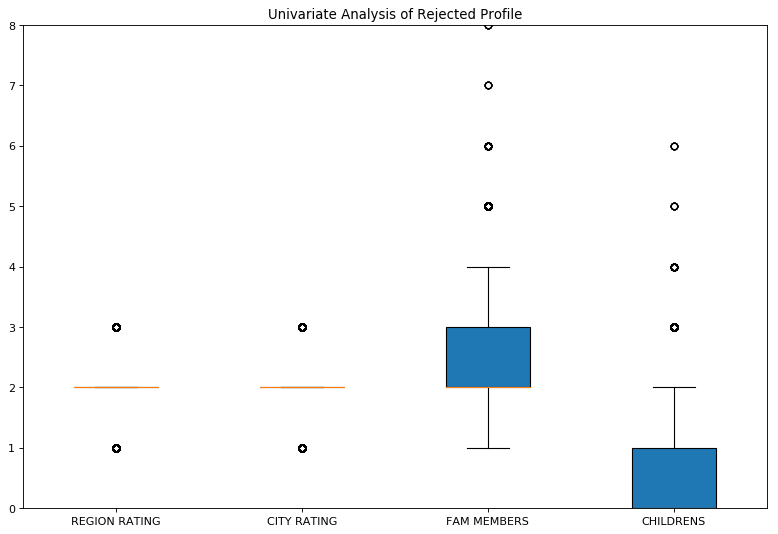

In [16]:
# Creating a box plot to understand univariate analysis if any between the Region, city, family member and number of childern of client whos loan is not approved.
# Thought process behind this was to see the correlation if any exisits between these 4 parameters for an applicant.
# As these 4 parameters consumes major chunck of persons earning. Hence these was considered as a prime subjects to perform analysis to understand if there is any pattern which shows these set of client do have some payment difficulties.

# setting figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

box_plot_data=[app_df_1['REGION_RATING_CLIENT'],app_df_1['REGION_RATING_CLIENT_W_CITY'],app_df_1['CNT_FAM_MEMBERS'],app_df_1['CNT_CHILDREN']]
plt.boxplot(box_plot_data,patch_artist=True,labels=['REGION RATING','CITY RATING','FAM MEMBERS','CHILDRENS'])
plt.title('Univariate Analysis of Rejected Profile')
# Scale has been adjusted to display clear image
plt.ylim(0,8)
plt.show()

In [17]:
# UNIVARIATE ANALYSIS OF THE ABOVE DATA

# As we can clearly see from the above graphs. There seems to be no such pattern observed with these 4 parameters of an application.
# It is obserervd that both the graphs has equal mean and variations has there 4 parameters has no impact on the customers profile.
# Hence we have to analyse some more patterns between other variables to find some correlation.

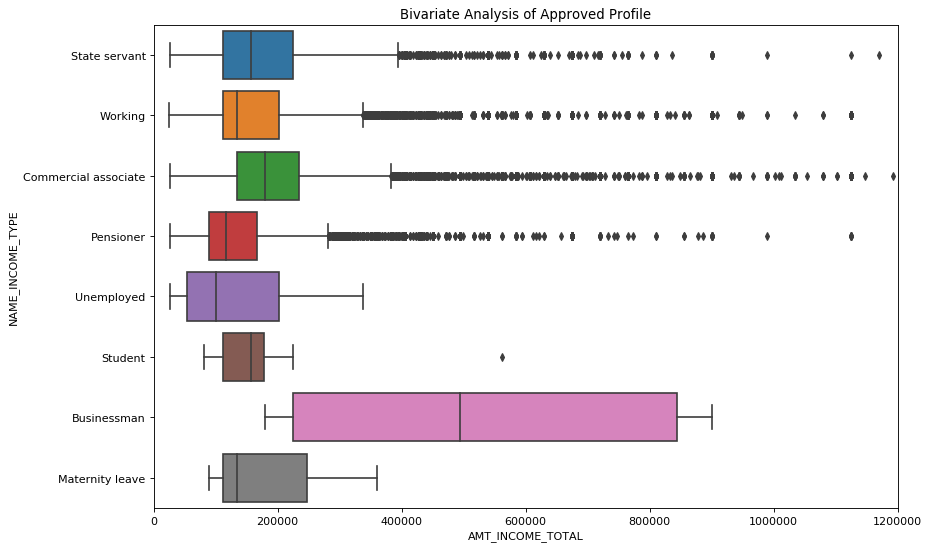

In [18]:
# Creating a box plot to understand bivariate analysis if any between the Total Income and Source of Income of the client who doesn't have any payment difficulties.
# Thought process behind this analysis is to compare the Total Income of the client w.r.t to Source of Income.
# Idea was to analyse if certain set of industry is a driving factor of the loan being approved or not.

# setting figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.boxplot(x='AMT_INCOME_TOTAL', y='NAME_INCOME_TYPE', data=app_df_0)
plt.title('Bivariate Analysis of Approved Profile')
# Scale has been adjusted to display clear image
plt.xlim(0,1200000.00)
plt.show()

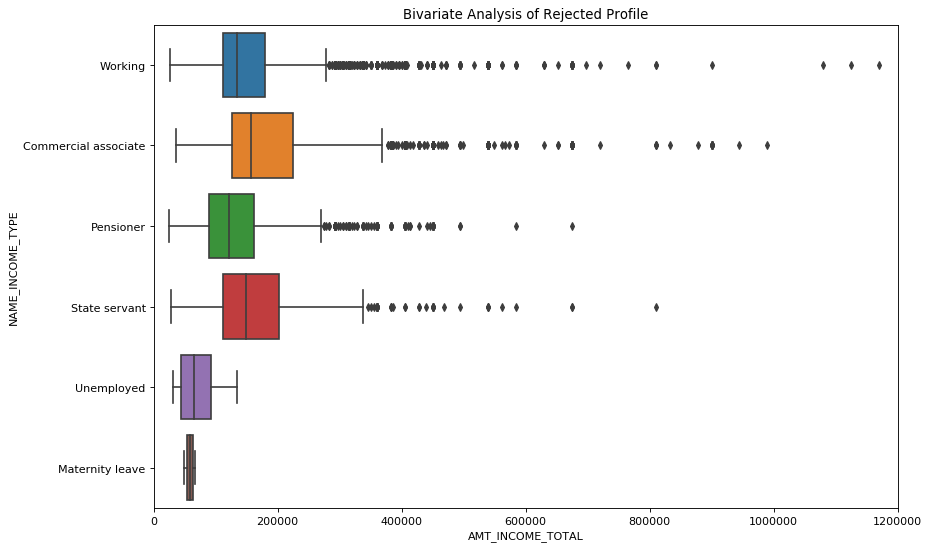

In [19]:
# Creating a box plot to understand bivariate analysis if any between the Total Income and Source of Income of the client who do have some payment difficulties.
# Thought process behind this analysis is to compare the Total Income of the client w.r.t to Source of Income.
# Idea was to analyse if certain set of industry is a driving factor of the loan being approved or not.

# setting figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.boxplot(x='AMT_INCOME_TOTAL', y='NAME_INCOME_TYPE', data=app_df_1)
plt.title('Bivariate Analysis of Rejected Profile')
# Scale has been adjusted to display clear image
plt.xlim(0,1200000.00)
plt.show()

In [20]:
# BIVARIATE ANALYSIS OF THE ABOVE DATA
# As we can clearly see the box plot of the various sources of Incomes of the client.
# Below are few of the observations.

# For example if we take into consideration the application of client having source of income as maternity leave.
# It is observed that client having income around 1,00,000 to 2,50,000 are more likely that the application will be approved.
# Whereas for the client having income aroung 50,000 to 60,000 are more likely that the application will be rejected.

# Also if we look at the clients having source of Income as state servent we are able to find some Outliers in the Dataset.
# There are clients in the dataset which has Income as 4,00,000 and as seen in the 1st graph the application has been approved.
# Whereas if we take look at the other data set the same application with same Income has been rejected.

In [21]:
## Importing Data Set of Previous_Application_Data

pre_df = pd.read_csv('previous_application.csv')
pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#As the total number of columns are huge. Hence, Selecting some columns to perform analysis

pre_df=pre_df[['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_SELLER_INDUSTRY']]

In [23]:
#Validating the percentage of Null Values in Application Data Set created from the excel provided in Sample

round(100*(pre_df.isnull().sum()/len(pre_df.index)),2)

SK_ID_PREV                 0.0
SK_ID_CURR                 0.0
NAME_CONTRACT_TYPE         0.0
AMT_APPLICATION            0.0
AMT_CREDIT                 0.0
HOUR_APPR_PROCESS_START    0.0
NAME_CASH_LOAN_PURPOSE     0.0
NAME_PAYMENT_TYPE          0.0
CODE_REJECT_REASON         0.0
NAME_CLIENT_TYPE           0.0
NAME_SELLER_INDUSTRY       0.0
dtype: float64

In [24]:
#Fetching some of null values
pre_df.isnull().sum()

SK_ID_PREV                 0
SK_ID_CURR                 0
NAME_CONTRACT_TYPE         0
AMT_APPLICATION            0
AMT_CREDIT                 1
HOUR_APPR_PROCESS_START    0
NAME_CASH_LOAN_PURPOSE     0
NAME_PAYMENT_TYPE          0
CODE_REJECT_REASON         0
NAME_CLIENT_TYPE           0
NAME_SELLER_INDUSTRY       0
dtype: int64

In [25]:
#As the missing data is not huge. Hence replacing the missing values with the mean of the column 'AMT_CREDIT'
pre_df.loc[np.isnan(pre_df['AMT_CREDIT']),['AMT_CREDIT']] = pre_df['AMT_CREDIT'].mean()

In [26]:
#Merging the Data Frame of Approved Current Loan with Previous Application Data Frames
approved_df = pd.merge(app_df_0,pre_df, how='left', on='SK_ID_CURR')

In [27]:
#Fetching the sample values to view for the DataFrame created
approved_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_SELLER_INDUSTRY
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1810518.0,Cash loans,900000.0,1035882.0,12.0,XNA,XNA,XAP,Repeater,XNA
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,2636178.0,Consumer loans,337500.0,348637.5,17.0,XAP,Cash through the bank,XAP,Refreshed,Furniture
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,2396755.0,Consumer loans,68809.5,68053.5,15.0,XAP,Cash through the bank,XAP,Refreshed,Consumer electronics
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1564014.0,Consumer loans,24282.0,20106.0,5.0,XAP,Cash through the bank,XAP,New,Connectivity
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2078043.0,Cash loans,675000.0,675000.0,15.0,XNA,Cash through the bank,XAP,Repeater,XNA


In [28]:
#Merging the Data Frame of Rejected Current Loan with Previous Application Data Frames
rejected_df = pd.merge(app_df_1,pre_df, how='left', on='SK_ID_CURR')
rejected_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_SELLER_INDUSTRY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1038818.0,Consumer loans,179055.0,179055.0,9.0,XAP,XNA,XAP,New,Auto technology
1,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,1472630.0,Revolving loans,0.0,450000.0,14.0,XAP,XNA,XAP,Repeater,XNA
3,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,2426800.0,Cash loans,157500.0,157500.0,15.0,XNA,Cash through the bank,XAP,Refreshed,XNA
4,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,1021215.0,Cash loans,675000.0,744498.0,11.0,XNA,Cash through the bank,LIMIT,Repeater,XNA


In [29]:
#Finding the Data Imbalance of the 2 Subdivided Data Sets after merging with previous application data set.
#Percentage of Data with TARGET as 0 is below :
print(format(len(approved_df)*100/(len(approved_df)+len(rejected_df)),'.2f')+ '%')

91.38%


In [30]:
#Finding the Data Imbalance of the 2 Subdivided Data Sets after merging with previous application data set.
#Percentage of Data with TARGET as 1 is below :
print(format(len(rejected_df)*100/(len(approved_df)+len(rejected_df)),'.2f')+ '%')

8.62%


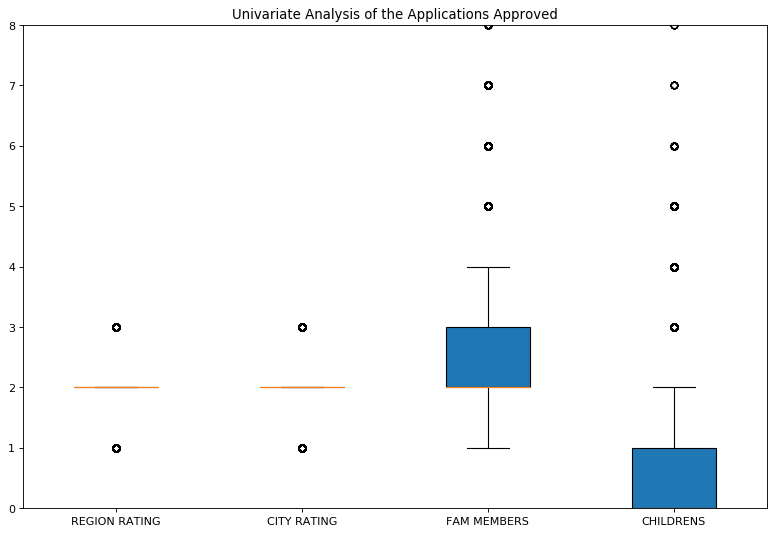

In [31]:
# Creating a box plot to understand univariate analysis if any between the Region, city, family member and number of childern of client whose application is approved including the previous applications client has applied.
# Though process behind this was same as the previous one to analyse if there as any pattern change in these parameters if these clients previous application data is also included in the analysis.

# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

box_plot_data=[approved_df['REGION_RATING_CLIENT'],approved_df['REGION_RATING_CLIENT_W_CITY'],approved_df['CNT_FAM_MEMBERS'],approved_df['CNT_CHILDREN']]
plt.boxplot(box_plot_data,patch_artist=True,labels=['REGION RATING','CITY RATING','FAM MEMBERS','CHILDRENS'])
plt.title('Univariate Analysis of the Applications Approved')
# Scale has been adjusted to display clear image
plt.ylim(0,8)
plt.show()

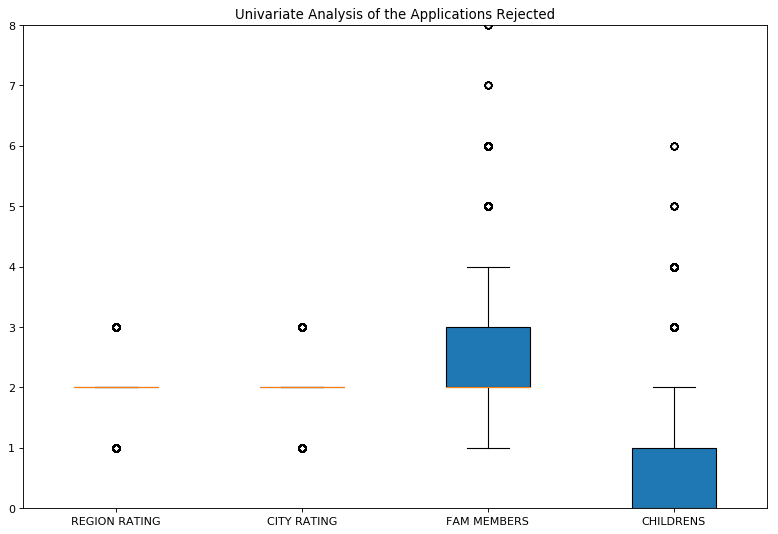

In [32]:
# Creating a box plot to understand univariate analysis if any between the Region, city, family member and number of childern of client whose application is rejected including the previous applications client has applied.
# Though process behind this was same as the previous one to analyse if there as any pattern change in these parameters if these clients previous application data is also included in the analysis.

# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

box_plot_data=[rejected_df['REGION_RATING_CLIENT'],rejected_df['REGION_RATING_CLIENT_W_CITY'],rejected_df['CNT_FAM_MEMBERS'],rejected_df['CNT_CHILDREN']]
plt.boxplot(box_plot_data,patch_artist=True,labels=['REGION RATING','CITY RATING','FAM MEMBERS','CHILDRENS'])
plt.title('Univariate Analysis of the Applications Rejected')

# Scale has been adjusted to display clear image
plt.ylim(0,8)
plt.show()

In [33]:
# UNIVARIATE ANALYSIS OF THE ABOVE DATA

# As we can clearly see from the above graphs. There seems to be no such pattern observed with these 4 parameters of an application.
# It is obserervd that both the graphs has equal mean and variations has there 4 parameters has no impact on the customers profile even if customers past applications has been considered.
# Hence we have to analyse some more patterns between other variables to find some correlation.

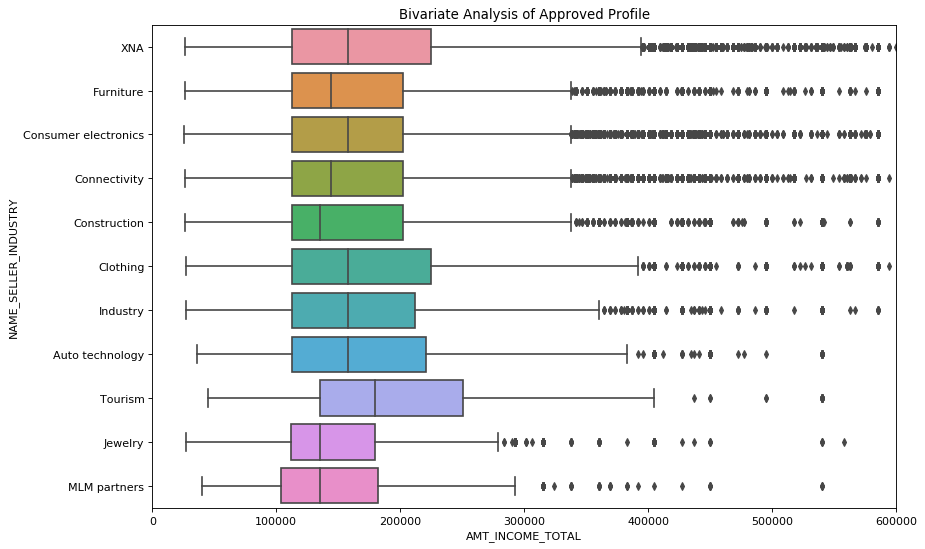

In [34]:
# Creating a box plot to understand bivariate analysis if any between the Total Income and Working Industry of the client whose application has been approved including the clients previous application data.
# Thought process behind this was to visualise if any pattern exists if clients previous data is taken into consideration as well

# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.boxplot(x='AMT_INCOME_TOTAL', y='NAME_SELLER_INDUSTRY', data=approved_df)
plt.xlim(0,600000.00)
plt.title('Bivariate Analysis of Approved Profile')
plt.show()

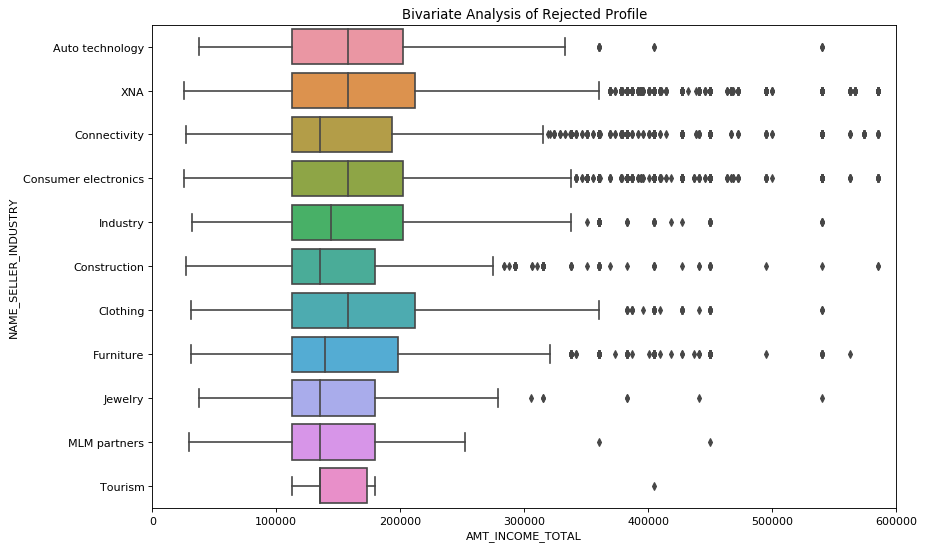

In [35]:
# Creating a box plot to understand bivariate analysis if any between the Total Income and Working Industry of the client
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.boxplot(x='AMT_INCOME_TOTAL', y='NAME_SELLER_INDUSTRY', data=rejected_df)
plt.xlim(0,600000.00)
plt.title('Bivariate Analysis of Rejected Profile')
plt.show()

In [36]:
# BIVARIATE ANALYSIS OF THE ABOVE DATA
# As we can clearly see the box plot of the various sources of Incomes of the client.
# Below are few of the observations.

# For example if we take into consideration the application of client having source of income as Tourism.
# It is observed that client having income around 1,50,000 to 1,80,000 are more likely that the application will be rejected.
# Whereas for the client having income aroung 1,50,000 to 2,50,000 are more likely that the application will be rejected. The spread for this box is wide spread.
# Hence signifies that there are huge variations in the data when taken consideration of the customers previour data.

# Also if we look at the clients having source of Income as Furniture we are able to find huge Outliers in the Dataset.
# Where in the customers has huge amount of income as a source but some applications are approved and rejected as well if taking 4,00,000 to 5,00,000 bracket as an amount.
# There are clients in the dataset which has Income as 4,00,000 and as seen in the 1st graph the application has been approved.
# Whereas if we take look at the other data set the same application with same Income has been rejected.